In [191]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora, models, similarities
import re
from nltk.tokenize import MWETokenizer



In [192]:
#variables
blog_df = pd.read_csv("CLEANER_CLEAN_BLOG.csv")
#"dictionary" is the corpus dictionary generated when the documents are turned into vectors, it declared later
#stopwords list load into memory
stopwords = [re.sub('\n','', line) for line in open("stopwords.txt")] 
number_of_lda_topics = 20

In [193]:
#sort the csv and drop empty cells and duplicate posts
blog_df['date'] = pd.to_datetime(blog_df['date'])
blog_df = blog_df.dropna(how="any")
blog_df = blog_df.sort_values(by="date")
blog_df.drop_duplicates("body")
blog_df.head()

,date,body
36,2005-07-09,You can now add a field for quotDate Recordedq...
38,2005-07-23,Many people have asked us how to put a list of...
35,2005-07-24,You know I really cant believe the pace that w...
33,2005-07-27,Its now possible to put an HTML snippet on you...
40,2005-08-11,We are ecstatic to announce the changes we mad...


In [194]:
#format or gensim using bag-of-words method
blog_df["tokenized_body"] = blog_df["body"].map(lambda paragraph: filter(lambda word: word not in stopwords,paragraph.lower().split(" ")))
#generate the gensim dictionary of all the words in the corpus
#TODO this should be tweaked it is very simplistic, need a topwords list etc.
#special thanks https://stackoverflow.com/questions/36250297/how-to-map-the-word-in-data-frame-to-integer-id-with-python-pandas-and-gensim
dictionary = corpora.Dictionary(blog_df["tokenized_body"])
dictionary.filter_extremes(no_below=1,no_above=1,keep_n=5000)
blog_df["bag_of_words"] = blog_df["tokenized_body"].map(dictionary.doc2bow)
blog_df.head()

,date,body,tokenized_body,bag_of_words
36,2005-07-09,You can now add a field for quotDate Recordedq...,"[add, field, quotdate, recordedquot, quotlocat...","[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2..."
38,2005-07-23,Many people have asked us how to put a list of...,"[people, list, videos, , , people, list, videos]","[(0, 2), (14, 2), (16, 2), (17, 2)]"
35,2005-07-24,You know I really cant believe the pace that w...,"[cant, believe, pace, releasing, features, mea...","[(0, 1), (18, 2), (19, 2), (20, 2), (21, 2), (..."
33,2005-07-27,Its now possible to put an HTML snippet on you...,"[html, snippet, website, automatically, pulls,...","[(0, 1), (13, 2), (14, 6), (26, 4), (27, 2), (..."
40,2005-08-11,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 3), (29, 2), (37, 2), (38, 4), (39, 2), (..."


In [195]:
#THIS TAKES A LONG TIME
#make the corpus object for gensim from blog_df
#relevant documentation copied from gensim website
corpus=blog_df["bag_of_words"]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
#latent semeantic indexing
#transform the tf-ldf corpus into a bunch of topixs
#lsi=models.LsiModel(corpus_tfidf,id2word=dictionary, num_topics=200)
#lda is supposed to make more sense
lda = models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=number_of_lda_topics, update_every=0, passes=50)
#corpus_lsi = lsi[corpus_tfidf]
#lsi.print_topics(200)
#lda.print_topics(200)


In [196]:
topics = lda.print_topics(number_of_lda_topics)
lda.print_topics(number_of_lda_topics)

[(0,
  u'0.009*"congratulations" + 0.003*"youtubers" + 0.003*"educational" + 0.003*"expanding" + 0.003*"interact" + 0.002*"onto" + 0.002*"greetings" + 0.002*"kurt" + 0.002*"jason" + 0.002*"australia"'),
 (1,
  u'0.012*"hi" + 0.008*"e3" + 0.007*"gaming" + 0.005*"paramnameallowfullscreen" + 0.005*"gamers" + 0.004*"movies" + 0.003*"peek" + 0.003*"sneak" + 0.003*"space" + 0.003*"partnership"'),
 (2,
  u'0.011*"weeks" + 0.009*"food" + 0.009*"ago" + 0.007*"recently" + 0.007*"film" + 0.005*"month" + 0.005*"announced" + 0.004*"simple" + 0.004*"started" + 0.003*"limit"'),
 (3,
  u'0.007*"june" + 0.006*"kicked" + 0.005*"2010" + 0.004*"mia" + 0.004*"4k" + 0.003*"included" + 0.003*"quagliarello" + 0.003*"beta" + 0.003*"8221" + 0.003*"film"'),
 (4,
  u'0.009*"spotlight" + 0.008*"08" + 0.007*"comedy" + 0.007*"choose" + 0.007*"earlier" + 0.005*"politics" + 0.004*"senator" + 0.004*"news" + 0.004*"theres" + 0.004*"cup"'),
 (5,
  u'0.007*"films" + 0.006*"film" + 0.005*"festival" + 0.005*"sundance" + 0.0

In [197]:
blog_df["associated_topics"] =  lda.get_document_topics(blog_df["bag_of_words"])
blog_df.head()

,date,body,tokenized_body,bag_of_words,associated_topics
36,2005-07-09,You can now add a field for quotDate Recordedq...,"[add, field, quotdate, recordedquot, quotlocat...","[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...","[(9, 0.7525947), (12, 0.08442437), (13, 0.1393..."
38,2005-07-23,Many people have asked us how to put a list of...,"[people, list, videos, , , people, list, videos]","[(0, 2), (14, 2), (16, 2), (17, 2)]","[(9, 0.44539446), (12, 0.22806305), (13, 0.232..."
35,2005-07-24,You know I really cant believe the pace that w...,"[cant, believe, pace, releasing, features, mea...","[(0, 1), (18, 2), (19, 2), (20, 2), (21, 2), (...","[(9, 0.34368417), (12, 0.061541777), (14, 0.41..."
33,2005-07-27,Its now possible to put an HTML snippet on you...,"[html, snippet, website, automatically, pulls,...","[(0, 1), (13, 2), (14, 6), (26, 4), (27, 2), (...","[(9, 0.61446685), (12, 0.36184895)]"
40,2005-08-11,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 3), (29, 2), (37, 2), (38, 4), (39, 2), (...","[(9, 0.24102595), (12, 0.108081125), (14, 0.62..."


In [198]:
#this is only getting the first topic not the most relevant for testing but 
#it needs to be fixed
#blog_df["main_topic"] =  lda.get_document_topics(blog_df["bag_of_words"]
#i can't tell if this one liner is beautiful or disgusting
#it basically just takes the list of associated topics and pivots it im sure pandas has a better way of doing it
for x in range(number_of_lda_topics):
    blog_df["topic_"+topics[x][1].split("+")[0].split("\"")[1]] = map(lambda listOfTopics : filter(lambda topic : topic[0]==x ,listOfTopics)[0][1] if len(filter(lambda topic : topic[0]==x ,listOfTopics)) == 1 else 0,blog_df["associated_topics"])
    

blog_df.head()

,date,body,tokenized_body,bag_of_words,associated_topics,topic_congratulations,topic_hi,topic_weeks,topic_june,topic_spotlight,...,topic_videos,topic_president,topic_film,topic_,topic_election,topic_weekday,topic_var,topic_team,topic_politics,topic_welcome
36,2005-07-09,You can now add a field for quotDate Recordedq...,"[add, field, quotdate, recordedquot, quotlocat...","[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...","[(9, 0.7525947), (12, 0.08442437), (13, 0.1393...",0.0,0.0,0.0,0.0,0.0,...,0.752595,0.0,0.0,0.084424,0.139370,0.000000,0.0,0.0,0.0,0.0
38,2005-07-23,Many people have asked us how to put a list of...,"[people, list, videos, , , people, list, videos]","[(0, 2), (14, 2), (16, 2), (17, 2)]","[(9, 0.44539446), (12, 0.22806305), (13, 0.232...",0.0,0.0,0.0,0.0,0.0,...,0.445394,0.0,0.0,0.228063,0.232098,0.000000,0.0,0.0,0.0,0.0
35,2005-07-24,You know I really cant believe the pace that w...,"[cant, believe, pace, releasing, features, mea...","[(0, 1), (18, 2), (19, 2), (20, 2), (21, 2), (...","[(9, 0.34368417), (12, 0.061541777), (14, 0.41...",0.0,0.0,0.0,0.0,0.0,...,0.343684,0.0,0.0,0.061542,0.000000,0.413092,0.0,0.0,0.0,0.0
33,2005-07-27,Its now possible to put an HTML snippet on you...,"[html, snippet, website, automatically, pulls,...","[(0, 1), (13, 2), (14, 6), (26, 4), (27, 2), (...","[(9, 0.61446685), (12, 0.36184895)]",0.0,0.0,0.0,0.0,0.0,...,0.614467,0.0,0.0,0.361849,0.000000,0.000000,0.0,0.0,0.0,0.0
40,2005-08-11,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 3), (29, 2), (37, 2), (38, 4), (39, 2), (...","[(9, 0.24102595), (12, 0.108081125), (14, 0.62...",0.0,0.0,0.0,0.0,0.0,...,0.241026,0.0,0.0,0.108081,0.000000,0.624330,0.0,0.0,0.0,0.0


In [199]:
blog_df.describe()

,topic_congratulations,topic_hi,topic_weeks,topic_june,topic_spotlight,topic_films,topic_happy,topic_hey,topic_58821,topic_videos,topic_president,topic_film,topic_,topic_election,topic_weekday,topic_var,topic_team,topic_politics,topic_welcome
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000
mean,0.008409,0.017429,0.026401,0.013270,0.026616,0.050024,0.013128,0.015618,0.027089,0.430551,0.016356,0.048693,0.090754,0.059741,0.031747,0.018906,0.009497,0.024509,0.010816
std,0.053842,0.079004,0.085261,0.063476,0.087521,0.122003,0.067152,0.075791,0.093144,0.252394,0.069061,0.111429,0.126667,0.127053,0.129982,0.091996,0.057815,0.104907,0.055044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.268537,0.000000,0.000000,0.022794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.478408,0.000000,0.000000,0.047116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.039306,0.000000,0.000000,0.000000,0.606152,0.000000,0.046986,0.105983,0.055112,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.771355,0.930314,0.860714,0.724160,0.731620,0.934947,0.766150,0.801228,0.787535,0.993581,0.721899,0.881756,0.952500,0.950954,0.860670,0.769807,0.823226,0.873887,0.672222


In [200]:
blog_df.set_index('date')

,body,tokenized_body,bag_of_words,associated_topics,topic_congratulations,topic_hi,topic_weeks,topic_june,topic_spotlight,topic_films,...,topic_videos,topic_president,topic_film,topic_,topic_election,topic_weekday,topic_var,topic_team,topic_politics,topic_welcome
date,,,,,,,,,,,,,,,,,,,,,
2005-07-09,You can now add a field for quotDate Recordedq...,"[add, field, quotdate, recordedquot, quotlocat...","[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...","[(9, 0.7525947), (12, 0.08442437), (13, 0.1393...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.752595,0.000000,0.000000,0.084424,0.139370,0.000000,0.000000,0.000000,0.000000,0.000000
2005-07-23,Many people have asked us how to put a list of...,"[people, list, videos, , , people, list, videos]","[(0, 2), (14, 2), (16, 2), (17, 2)]","[(9, 0.44539446), (12, 0.22806305), (13, 0.232...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.445394,0.000000,0.000000,0.228063,0.232098,0.000000,0.000000,0.000000,0.000000,0.000000
2005-07-24,You know I really cant believe the pace that w...,"[cant, believe, pace, releasing, features, mea...","[(0, 1), (18, 2), (19, 2), (20, 2), (21, 2), (...","[(9, 0.34368417), (12, 0.061541777), (14, 0.41...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.343684,0.000000,0.000000,0.061542,0.000000,0.413092,0.000000,0.000000,0.000000,0.000000
2005-07-27,Its now possible to put an HTML snippet on you...,"[html, snippet, website, automatically, pulls,...","[(0, 1), (13, 2), (14, 6), (26, 4), (27, 2), (...","[(9, 0.61446685), (12, 0.36184895)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.614467,0.000000,0.000000,0.361849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-08-11,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 3), (29, 2), (37, 2), (38, 4), (39, 2), (...","[(9, 0.24102595), (12, 0.108081125), (14, 0.62...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.241026,0.000000,0.000000,0.108081,0.000000,0.624330,0.000000,0.000000,0.000000,0.000000
2005-08-21,How goes it folks We have added a ton of new f...,"[goes, folks, added, ton, features, site, , go...","[(0, 1), (20, 2), (29, 2), (49, 2), (50, 2), (...","[(5, 0.14646523), (9, 0.6866574), (12, 0.10616...",0.000000,0.000000,0.000000,0.000000,0.000000,0.146465,...,0.686657,0.000000,0.000000,0.106163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-09-12,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 1), (29, 2), (37, 2), (38, 4), (39, 2), (...","[(9, 0.25117844), (12, 0.038340688), (14, 0.68...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.251178,0.000000,0.000000,0.038341,0.000000,0.682148,0.000000,0.000000,0.000000,0.000000
2005-10-25,Its been awhile since our last update but weve...,"[awhile, update, weve, busy, bringing, lots, f...","[(0, 2), (20, 2), (53, 2), (54, 4), (55, 2), (...","[(9, 0.39881885), (11, 0.08234174), (12, 0.070...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.398819,0.000000,0.082342,0.070606,0.422427,0.000000,0.000000,0.000000,0.000000,0.000000
2005-11-07,end block,[block],"[(64, 1)]","[(0, 0.025), (1, 0.025), (2, 0.025), (3, 0.025...",0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000


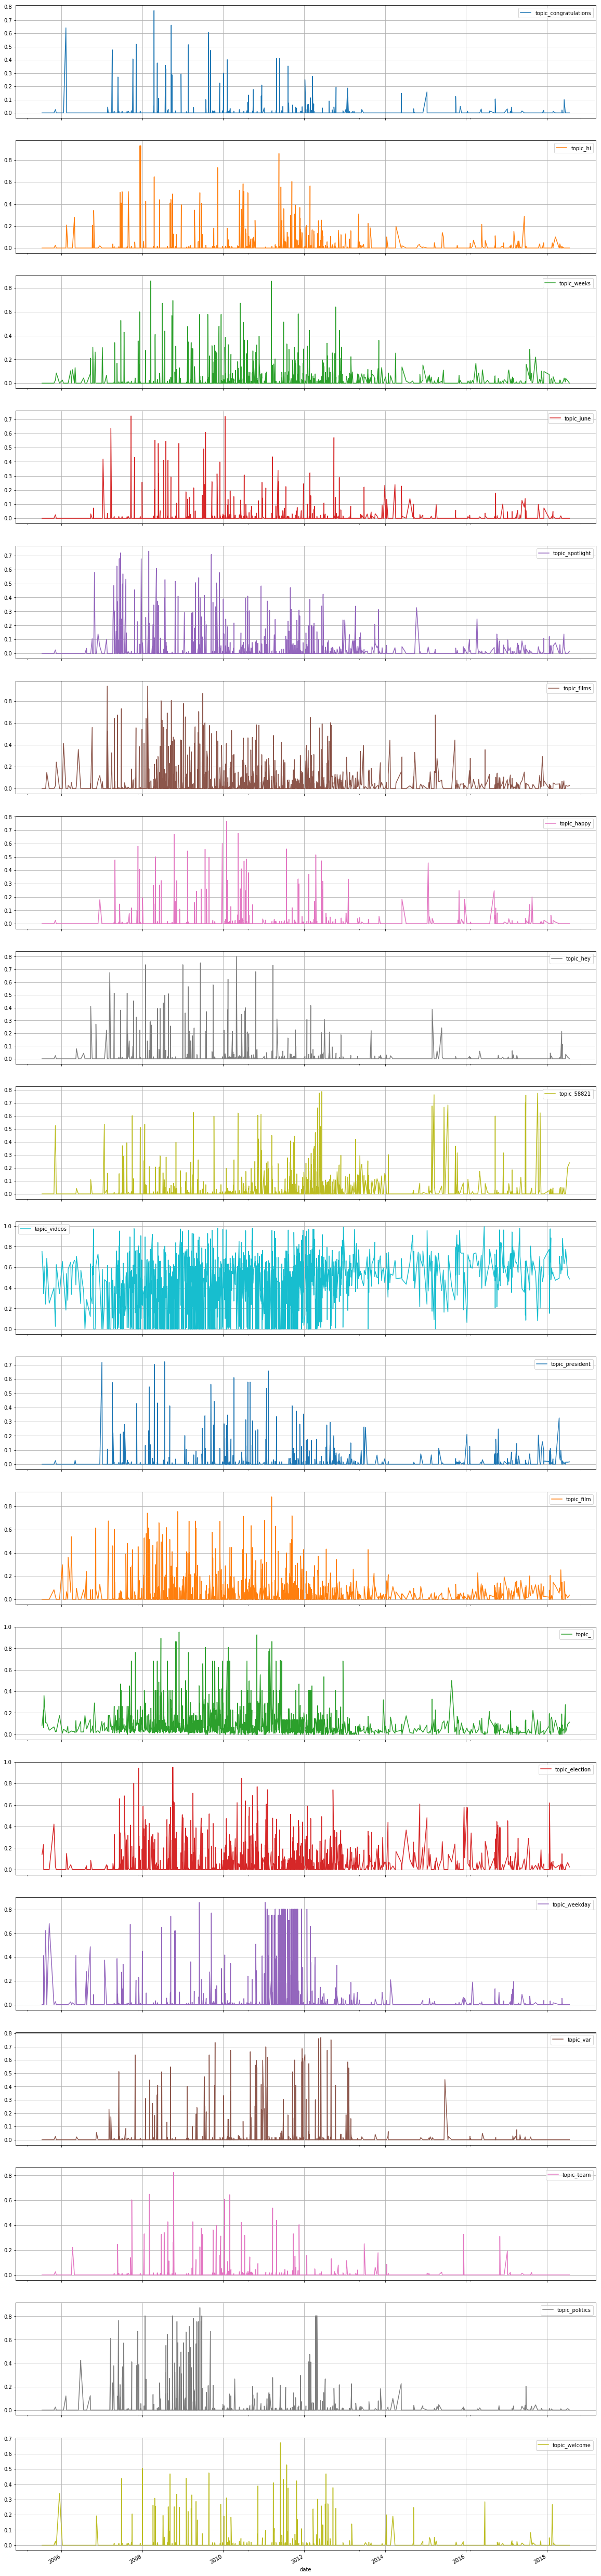

In [201]:
blog_df.plot.line(x="date",y=[x+4 for x in  range(number_of_lda_topics)],subplots=True,figsize=(20,100),grid=True)
plt.savefig("topics.pdf")

In [202]:
start_date='20';
for x in range(13):
    xtraZero= '0' if (x+5<10) else '';
    otherXtraZero= '0' if (x+6<10) else '';
    mask = (blog_df['date'] > (start_date + xtraZero + str(x+5) +"-01-01")) & (blog_df['date'] <= (start_date+ otherXtraZero + str(x + 6)+"-01-01"));
    print(start_date + xtraZero + str(x+5) + "  " + str(blog_df.loc[mask]['date'].count()) )

2005  11
2006  37
2007  128
2008  243
2009  247
2010  249
2011  267
2012  212
2013  79
2014  33
2015  45
2016  56
2017  54


In [203]:
mask = (blog_df['date'] > "2005-01-01") & (blog_df['date'] < ("2014-01-01")) & (blog_df["topic_politics"]>.8);
mask2 = (blog_df['date'] > "2004-01-01") & (blog_df['date'] < ("2014-01-01"));

print float(blog_df.loc[mask]['date'].count())/blog_df.loc[mask2]['date'].count();
print blog_df.loc[mask]["date"]
mask = (blog_df['date'] > "2014-01-01") & (blog_df["topic_politics"]>.2);
mask2 = (blog_df['date'] > "2014-01-01");

print float(blog_df.loc[mask]['date'].count())/blog_df.loc[mask2]['date'].count();
print blog_df.loc[mask]["date"]

0.00475220638153
510    2008-01-25
345    2008-09-29
1321   2009-06-04
1322   2009-06-22
255    2012-04-13
259    2012-04-20
258    2012-04-27
Name: date, dtype: datetime64[ns]
0.00913242009132
1730   2014-05-27
1845   2017-06-27
Name: date, dtype: datetime64[ns]


In [204]:
for x in range(12):
    mask = (blog_df['date'] > "2012-"+str(x+1)+"-01") & (blog_df["date"]<"2012-"+str(x+1)+"-28")
    print (str(x+1) + " " + str(blog_df.loc[mask]['date'].count()))
for x in range(12):
    mask = (blog_df['date'] > "2014-"+str(x+1)+"-01") & (blog_df["date"]<"2014-"+str(x+1)+"-28")
    print (str(x+1) + " " + str(blog_df.loc[mask]['date'].count()))


1 19
2 22
3 17
4 14
5 15
6 24
7 12
8 10
9 11
10 14
11 9
12 9
1 4
2 2
3 1
4 2
5 1
6 2
7 1
8 1
9 5
10 1
11 3
12 2


In [205]:
blog_df.to_csv("blog_CSV_with_topics.csv")

In [206]:
blog_df[blog_df["body"].str.lower().str.contains("wojcicki")]

,date,body,tokenized_body,bag_of_words,associated_topics,topic_congratulations,topic_hi,topic_weeks,topic_june,topic_spotlight,...,topic_videos,topic_president,topic_film,topic_,topic_election,topic_weekday,topic_var,topic_team,topic_politics,topic_welcome
1845,2017-06-27,Happy Pride everyone The LGBTQ community has b...,"[happy, pride, lgbtq, community, vital, youtub...","[(0, 1), (13, 2), (14, 2), (17, 8), (71, 2), (...","[(1, 0.018089887), (3, 0.054467775), (9, 0.580...",0.000000,0.018090,0.0,0.054468,0.000000,...,0.580962,0.010546,0.118196,0.011201,0.000000,0.0,0.0,0.0,0.203004,0.0
1860,2017-12-04,As the CEO of YouTube I8217ve seen how our ope...,"[ceo, youtube, i8217ve, seen, platform, force,...","[(0, 1), (8, 2), (9, 2), (13, 2), (14, 8), (17...","[(0, 0.018498162), (1, 0.048127826), (4, 0.018...",0.018498,0.048128,0.0,0.000000,0.018829,...,0.521562,0.099902,0.108795,0.035185,0.051075,0.0,0.0,0.0,0.000000,0.0


SyntaxError: invalid syntax (<ipython-input-207-42ecf778049c>, line 1)

In [ ]:
mask = (blog_df['date'] < "2014-01-01") &  (blog_df['date'] < "2014-01-01") & (blog_df["topic_politics"]>.2);

blog_df.loc[mask].count()

In [225]:
mask = (blog_df['date'] > "2001-01-01") &  (blog_df['date'] < "2020-01-01") & (blog_df["topic_election"]>.6)

print blog_df.loc[mask]["date"]
print blog_df.loc[mask]["body"]

748    2007-06-08
690    2007-07-23
673    2007-10-16
737    2007-11-28
370    2008-10-01
364    2008-10-03
357    2008-10-10
379    2008-10-15
1358   2009-04-02
969    2010-05-06
1052   2010-06-15
863    2010-07-19
802    2010-09-23
993    2010-11-03
1613   2011-01-25
1526   2011-02-05
53     2012-09-18
1734   2014-11-11
21     2018-01-26
Name: date, dtype: datetime64[ns]
748     When artists Arin Crumley and Susan Buice firs...
690     On July 23 at 7 pm ET on CNN you get to make p...
673     We all know that YouTube is chockfull of craft...
737     Tonight is the night of the muchanticipated CN...
370     The US presidential election is just over a mo...
364     The US presidential election is just over a mo...
357     We are starting to test fulllength programming...
379     In less than three weeks one of the most excit...
1358    As Congress considers this years budget and th...
969     Season three of the Indian Premier League IPL ...
1052    Tonight at 8 pm ET watch President O

In [226]:
blog_df[blog_df["date"] == "2011-09-30"]

,date,body,tokenized_body,bag_of_words,associated_topics,topic_congratulations,topic_hi,topic_weeks,topic_june,topic_spotlight,...,topic_videos,topic_president,topic_film,topic_,topic_election,topic_weekday,topic_var,topic_team,topic_politics,topic_welcome
1410,2011-09-30,Today we8217re kicking off a series of posts a...,"[we8217re, kicking, series, posts, videos, it8...","[(0, 1), (13, 2), (14, 2), (17, 2), (77, 2), (...","[(8, 0.39608502), (9, 0.5116154), (12, 0.04767...",0.0,0.0,0.0,0.0,0.0,...,0.511615,0.0,0.0,0.047677,0.0,0.00000,0.0,0.0,0.0,0.0
1418,2011-09-30,There seem to be more rumors circulating latel...,"[rumors, circulating, lately, youtube8217s, co...","[(0, 2), (196, 2), (236, 2), (656, 2), (1751, 2)]","[(9, 0.33943108), (12, 0.18616675), (14, 0.397...",0.0,0.0,0.0,0.0,0.0,...,0.339431,0.0,0.0,0.186167,0.0,0.39713,0.0,0.0,0.0,0.0
1416,2011-09-30,Each weekday we at Check back every day for th...,"[weekday, check, day, whats, trending, youtube...","[(0, 2), (56, 2), (77, 2), (539, 2), (1052, 2)...","[(12, 0.13681033), (14, 0.8031897)]",0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.136810,0.0,0.80319,0.0,0.0,0.0,0.0


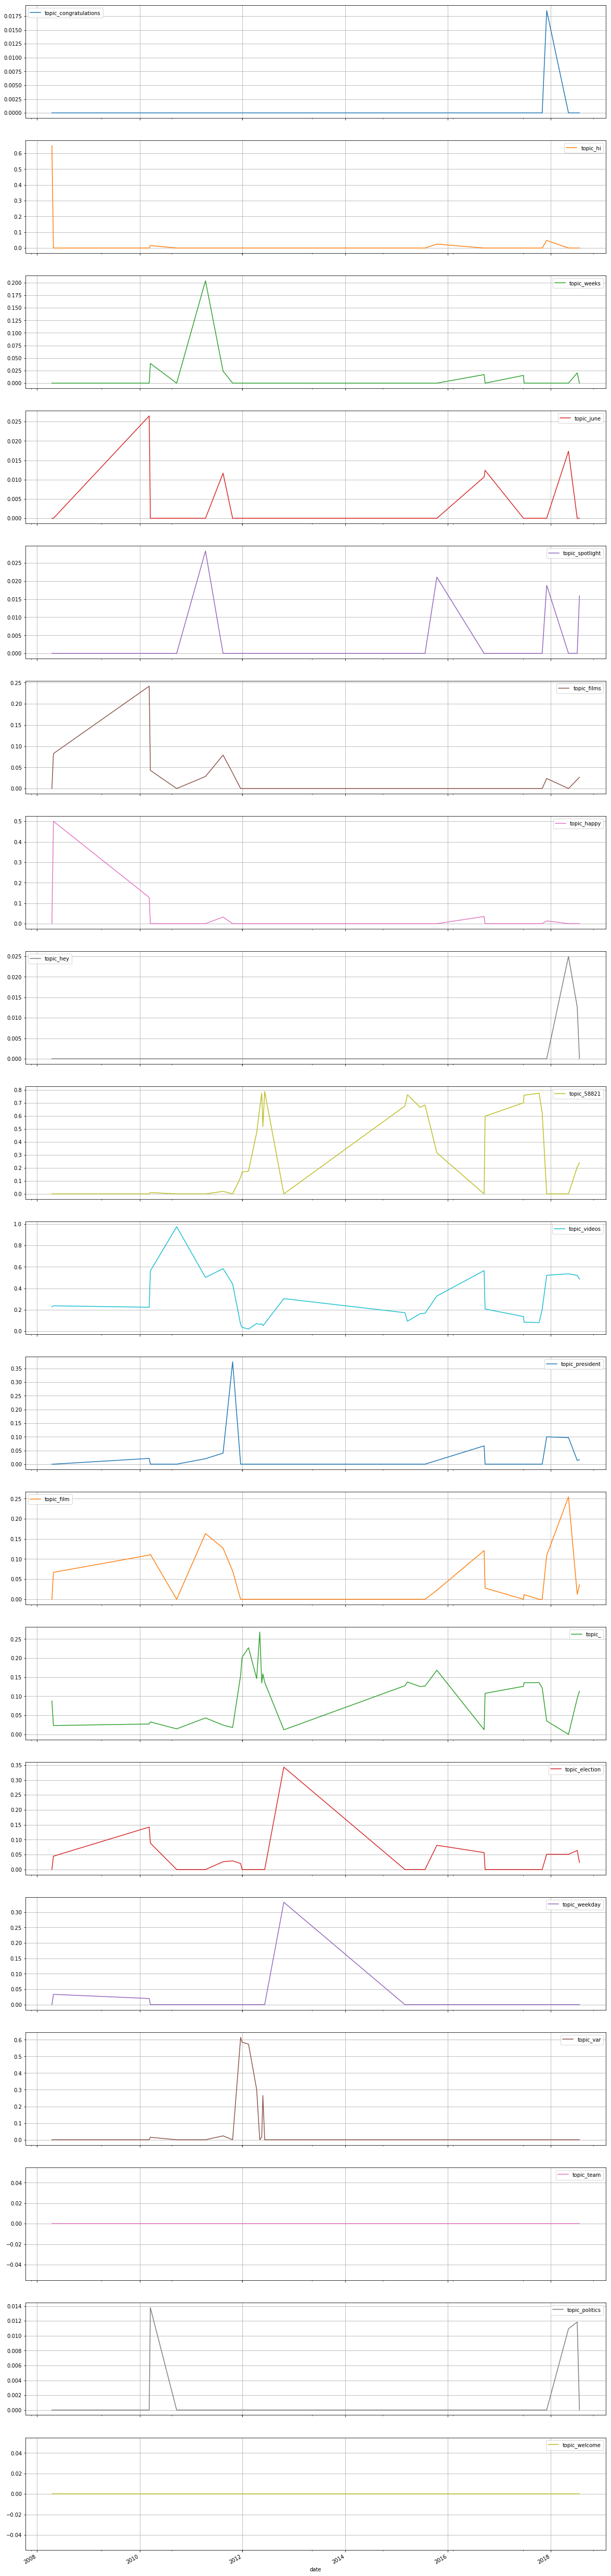

In [230]:
policy_df = blog_df[blog_df["body"].str.lower().str.contains("policy")]
policy_df.plot.line(x="date",y=[x+4 for x in  range(number_of_lda_topics)],subplots=True,figsize=(20,100),grid=True)
plt.savefig("policy_topics.pdf")

In [234]:
print [x for x in policy_df["body"]]

['We are very excited to announce some big changes to our policy enforcement systems Having clear rules and fair consequences are genuinely important to us and these improvements have been a long time coming  We are very excited to announce some big changes to our policy enforcement systems Having clear rules and fair consequences are genuinely important to us and these improvements have been a long time coming', 'Energy independence has been one of the most talkedabout issues of this election 8212 and if youve filled up your gas tank lately you know why With oil exceeding 115 a barrel and gas prices expected to reach a national average of 400 a gallon by the summer the need to reform our current energy policy is no longer just an environmental issue its becoming an economic necessity  Energy independence has been one of the most talkedabout issues of this election 8212 and if youve filled up your gas tank lately you know why With oil exceeding 115 a barrel and gas prices expected to r

In [236]:
policy_df["date"].describe()

count                      32
unique                     32
top       2017-06-22 00:00:00
freq                        1
first     2008-04-17 00:00:00
last      2018-07-25 00:00:00
Name: date, dtype: object

In [237]:
policy_df["date"]

548    2008-04-17
547    2008-04-28
919    2010-03-10
905    2010-03-18
805    2010-09-21
1679   2011-04-14
1480   2011-08-17
1432   2011-10-24
1691   2011-12-20
1715   2011-12-30
143    2012-02-14
265    2012-04-12
170    2012-05-04
183    2012-05-18
182    2012-05-26
232    2012-06-08
73     2012-10-22
296    2015-03-02
297    2015-03-20
316    2015-06-18
292    2015-07-23
287    2015-10-15
1759   2016-09-15
1754   2016-09-22
1850   2017-06-22
1846   2017-06-26
1810   2017-10-11
1837   2017-11-02
1860   2017-12-04
18     2018-05-08
1      2018-07-09
0      2018-07-25
Name: date, dtype: datetime64[ns]